<a href="https://colab.research.google.com/github/MoMus2000/All-things-autoencoder/blob/master/ConvAutoEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Reshape,Dense,MaxPooling2D,Conv2DTranspose,UpSampling2D
from tensorflow.keras.optimizers import SGD


In [2]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()
X_train = X_train/255.0
X_test = X_test/255.0

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)
print(X_train.shape)

(60000, 28, 28, 1)


In [4]:
# encoder = Sequential()
# encoder.add(Conv2D(64,(3,3),input_shape=(28,28,1),padding='same'))
# encoder.add(MaxPooling2D((2,2)))
# encoder.add(Conv2D(32,(3,3),padding='same'))
# encoder.add(MaxPooling2D((2,2)))
# encoder.add(Conv2D(16,(3,3),padding='same'))
# encoder.add(MaxPooling2D((2,2)))
# encoder.summary()

# decoder = Sequential()
# # decoder.add()

In [87]:
enc = Sequential()
enc.add( Conv2D(16, (3, 3), activation='relu', padding='same',input_shape=(28,28,1)))
enc.add(MaxPooling2D((2, 2), padding='same'))
enc.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
enc.add(MaxPooling2D((2, 2), padding='same'))
enc.add(Conv2D(8, (3, 3), activation='relu', padding='same',name='MUSAFA'))
enc.add(MaxPooling2D((2, 2), padding='same'))
# enc.add(Reshape([128],name='MUSTAFA'))
enc.summary()

dec = Sequential()
# dec.add(Reshape((4,4,8),input_shape = [128]))
dec.add(Conv2D(8, (3, 3), activation='relu', padding='same',input_shape = (4,4,8)))
dec.add(UpSampling2D((2, 2)))
dec.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
dec.add(UpSampling2D((2, 2)))
dec.add(Conv2D(16, (3, 3), activation='relu'))
dec.add(UpSampling2D((2, 2)))
dec.add(Conv2D(1, (3, 3), activation='sigmoid', padding='same'))
dec.summary()

Model: "sequential_51"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_92 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_93 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
MUSAFA (Conv2D)              (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 4, 4, 8)           0         
Total params: 1,904
Trainable params: 1,904
Non-trainable params: 0
___________________________________________________

In [88]:
encoder = Sequential([enc,dec])
encoder.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.001))

In [89]:
encoder.fit(X_train,X_train,epochs=10,validation_data=(X_test,X_test))

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1559 - val_loss: 0.1188
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1143 - val_loss: 0.1090
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1075 - val_loss: 0.1040
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1036 - val_loss: 0.1007
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1011 - val_loss: 0.0987
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0992 - val_loss: 0.0971
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0978 - val_loss: 0.0959
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0968 - val_loss: 0.0956
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0960 - val_loss: 0.0943
Epoch 10/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.095

In [75]:
!pip install bokeh

In [90]:
from tensorflow.keras import Model
layer_name = 'MUSAFA'
intermediate_layer_model = Model(inputs=enc.input,outputs=enc.get_layer(layer_name).output)

In [96]:
intermediate_output = intermediate_layer_model.predict(X_test)
# BEFORE SHAPE WAS (10000,7,7,8)
# 7*7*8 --> 392
intermediate_output = intermediate_output.reshape(10000,392)

In [97]:
from sklearn.manifold import TSNE
tsne_model = TSNE(n_components=2, verbose=1, random_state=0)
tsne_img_label = tsne_model.fit_transform(intermediate_output)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.405s...
[t-SNE] Computed neighbors for 10000 samples in 75.867s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 3.523367
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.157166
[t-SNE] KL divergence after 1000 iterations: 1.755921


In [98]:
import pandas as pd
import numpy as np
tsne_df = pd.DataFrame(tsne_img_label, columns=['x', 'y'])
tsne_df['image_label'] = y_test

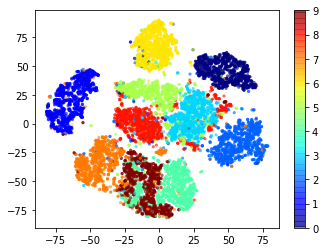

In [99]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
cmap = plt.cm.get_cmap('jet')
plt.scatter(tsne_df['x'], tsne_df['y'], 
            alpha=0.5, c=y_test, cmap=cmap, s=5)
plt.colorbar()